In [1]:
import numpy as np
import matplotlib.pyplot as plt
from opart_lda import lopart

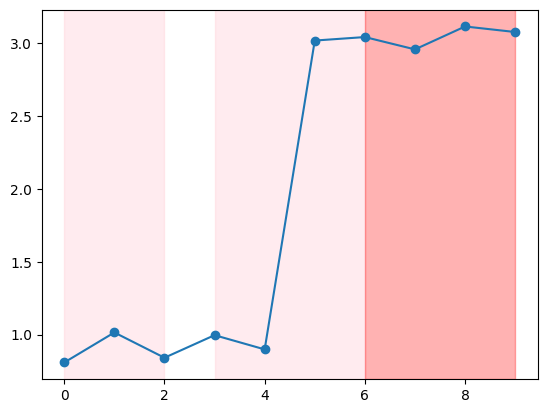

In [2]:
# template vector
values = [1, 3]
segment_length = 10 // 2
noise_strength = 0.1

sequence = np.concatenate([
    np.full(segment_length, value) + np.random.normal(0, noise_strength, segment_length) 
    for value in values
])

neg_start = np.array([0, 3], dtype=np.int32)
neg_end = np.array([2, 6], dtype=np.int32)
pos_start = np.array([6], dtype=np.int32)
pos_end = np.array([9], dtype=np.int32)

plt.plot(sequence, marker='o')
for i in range(len(neg_start)):
    plt.axvspan(neg_start[i], neg_end[i], ymin=0, ymax=4, color='pink', alpha=0.3)
for i in range(len(pos_start)):
    plt.axvspan(pos_start[0], pos_end[0], ymin=0, ymax=4, color='red', alpha=0.3)

In [3]:
def get_mean(sequence, chpnt):
    mean = np.zeros(len(sequence))
    chpnt = np.append(chpnt, len(sequence)-1)
    chpnt = np.append(-1, chpnt)
    chpnt = chpnt + 1
    for i in range(len(chpnt)-1):
        mean[chpnt[i]:chpnt[i+1]] = np.mean(sequence[chpnt[i]:chpnt[i+1]])
    return mean

def plot_chpnt(sequence, chpnt):
    mean = get_mean(sequence, chpnt)
    
    plt.plot(mean)
    plt.plot(sequence, marker='o')

    # Add vertical lines at positions in chpnt
    for position in chpnt:
        plt.axvline(x=position + 0.5, color='red', linestyle='--', label='Changepoint' if position == chpnt[0] else "")

    plt.legend()
    plt.show()

In [4]:
chpnt = lopart(sequence, neg_start, neg_end, pos_start, pos_end, lda=0)

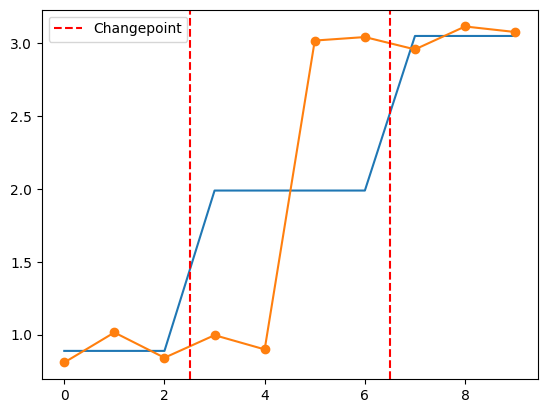

In [5]:
plot_chpnt(sequence, chpnt)